# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?&units=metric&q="
# query_url=f"{url}{city}&appid={weather_api_key}"
# requests.get(query_url).json()

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | north bend
Processing Record 3 of Set 1 | trenggalek
Processing Record 4 of Set 1 | clarence-rockland
Processing Record 5 of Set 1 | turpan
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | poronaysk
Processing Record 9 of Set 1 | selfoss
Processing Record 10 of Set 1 | yangor
City not found. Skipping...
Processing Record 11 of Set 1 | kalmunai
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | kingston
Processing Record 17 of Set 1 | middleton
Processing Record 18 of Set 1 | aleksandrov gay
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | lata
Processing Record 21 of Set 1 | port lincoln
Processing Record 22 of Set 1

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,6.25,56,75,7.20,CL,1686508928
1,north bend,43.4065,-124.2243,22.91,72,0,6.17,US,1686508928
2,trenggalek,-8.0500,111.7167,23.24,96,100,0.64,ID,1686508928
3,clarence-rockland,45.5501,-75.2910,25.12,68,100,1.93,CA,1686508643
4,turpan,42.9333,89.1667,37.56,11,2,5.23,CN,1686508757


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,6.25,56,75,7.20,CL,1686508928
1,north bend,43.4065,-124.2243,22.91,72,0,6.17,US,1686508928
2,trenggalek,-8.0500,111.7167,23.24,96,100,0.64,ID,1686508928
3,clarence-rockland,45.5501,-75.2910,25.12,68,100,1.93,CA,1686508643
4,turpan,42.9333,89.1667,37.56,11,2,5.23,CN,1686508757


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

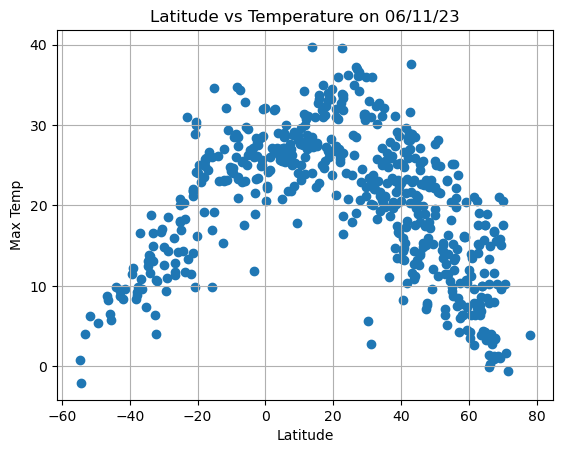

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)
plt.title("Latitude vs Temperature on 06/11/23")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

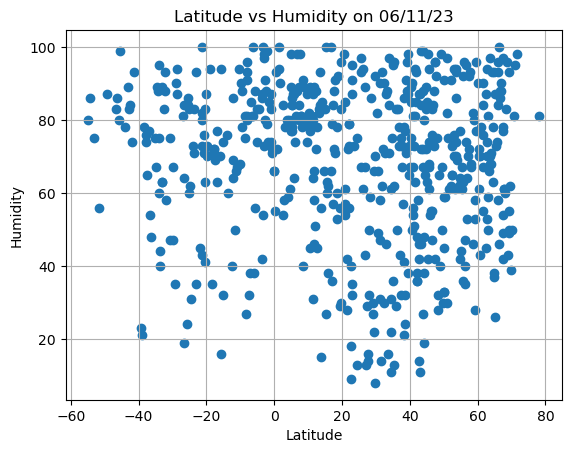

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.title("Latitude vs Humidity on 06/11/23")


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

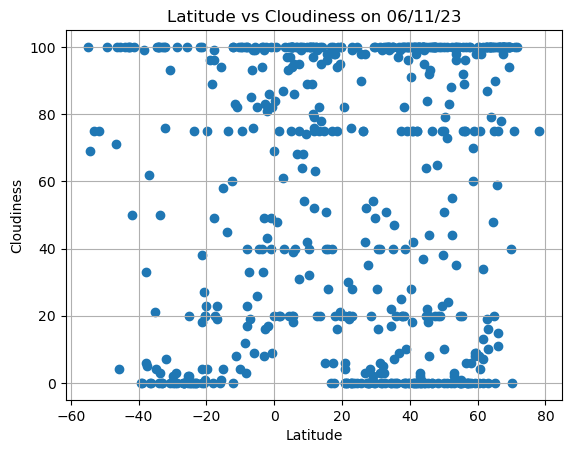

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.title("Latitude vs Cloudiness on 06/11/23")


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

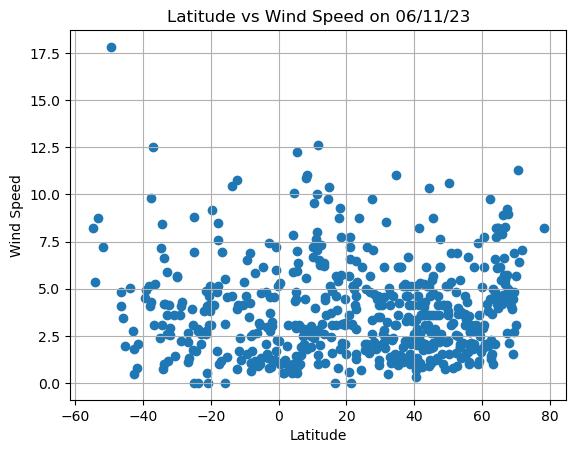

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.title("Latitude vs Wind Speed on 06/11/23")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
def math_function(x_values, y_values, y_label, text_coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coord,fontsize=15,color="purple")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f'R-value is : {rvalue}')

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,north bend,43.4065,-124.2243,22.91,72,0,6.17,US,1686508928
3,clarence-rockland,45.5501,-75.2910,25.12,68,100,1.93,CA,1686508643
4,turpan,42.9333,89.1667,37.56,11,2,5.23,CN,1686508757
5,ribeira grande,38.5167,-28.7000,20.22,77,40,4.12,PT,1686508928
7,poronaysk,49.2167,143.1167,9.67,98,100,0.76,RU,1686508929


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,6.25,56,75,7.20,CL,1686508928
2,trenggalek,-8.0500,111.7167,23.24,96,100,0.64,ID,1686508928
6,adamstown,-25.0660,-130.1015,20.79,60,2,6.94,PN,1686508928
13,waitangi,-43.9535,-176.5597,9.90,78,100,5.05,NZ,1686508930
19,port lincoln,-34.7333,135.8667,12.52,67,4,7.18,AU,1686508931


###  Temperature vs. Latitude Linear Regression Plot

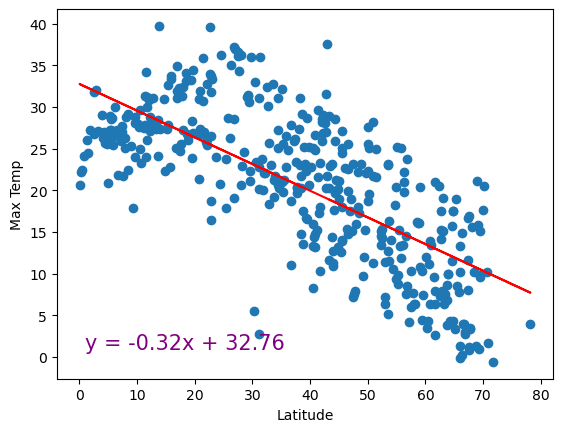

R-value is : -0.7204824893775122


In [41]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values= northern_hemi_df["Max Temp"]
math_function(x_values, y_values, "Max Temp", (1,1))

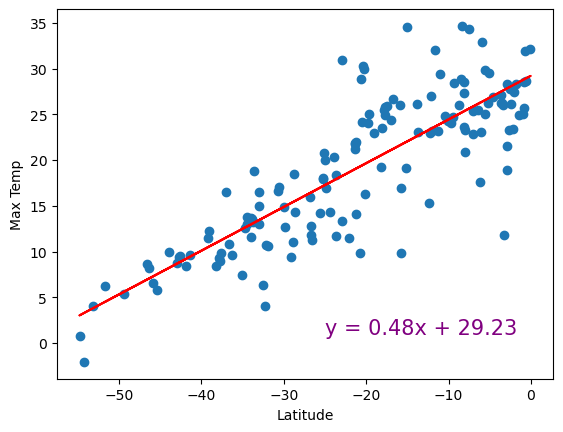

R-value is : 0.8349675670173118


In [43]:
# Linear regression on Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values= southern_hemi_df["Max Temp"]
math_function(x_values, y_values, "Max Temp", (-25,1))

### Humidity vs. Latitude Linear Regression Plot

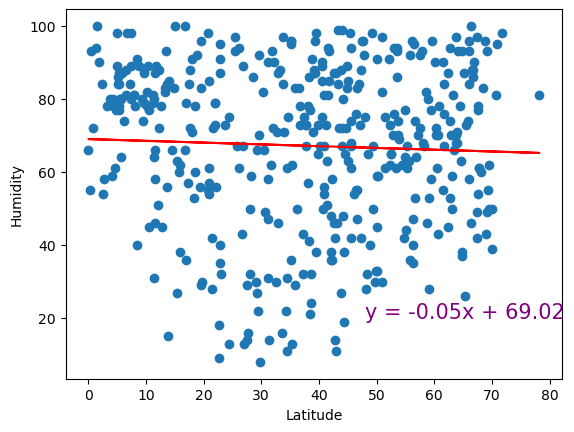

R-value is : -0.043421942146069155


In [46]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values= northern_hemi_df["Humidity"]
math_function(x_values, y_values, "Humidity", (48,20))

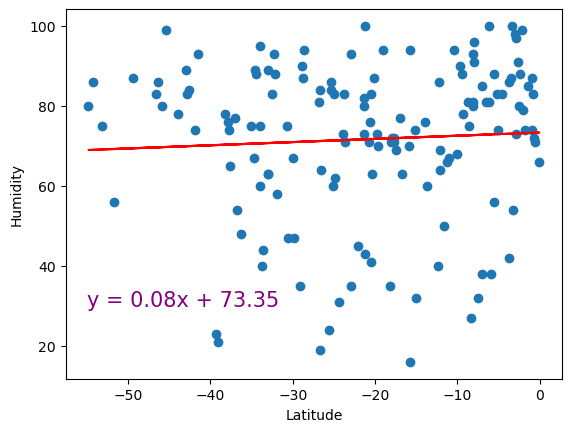

R-value is : 0.05752587979975584


In [48]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values= southern_hemi_df["Humidity"]
math_function(x_values, y_values, "Humidity", (-55,30))

### Cloudiness vs. Latitude Linear Regression Plot

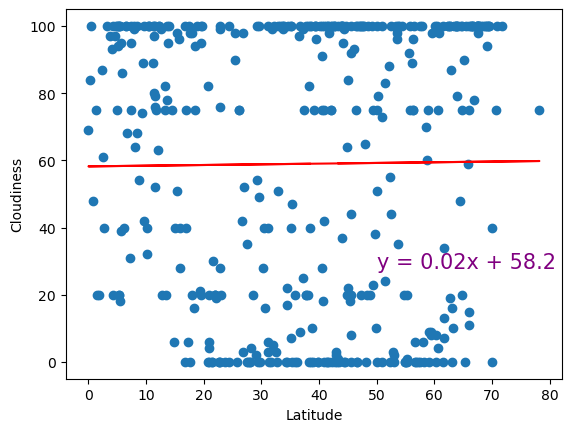

R-value is : 0.009936879000472998


In [51]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values= northern_hemi_df["Cloudiness"]
math_function(x_values, y_values, "Cloudiness", (50,28))

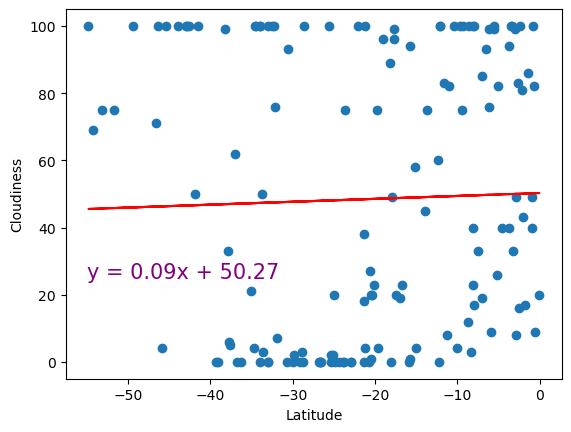

R-value is : 0.029556902802475277


In [53]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values= southern_hemi_df["Cloudiness"]
math_function(x_values, y_values, "Cloudiness", (-55,25))

### Wind Speed vs. Latitude Linear Regression Plot

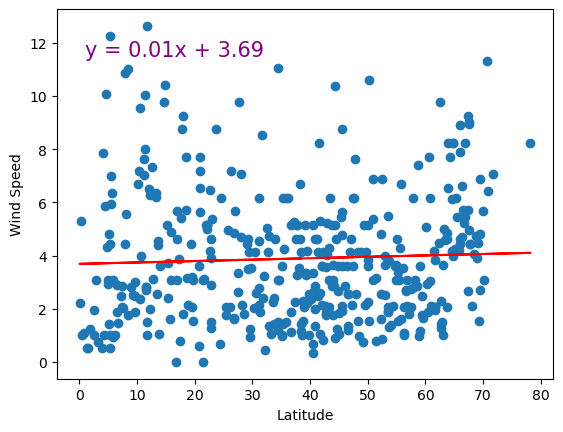

R-value is : 0.043553746242570066


In [58]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values= northern_hemi_df["Wind Speed"]
math_function(x_values, y_values, "Wind Speed", (1,11.5))

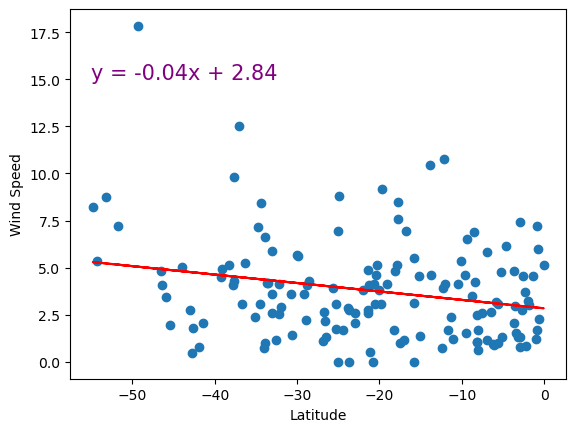

R-value is : -0.2352297514981698


In [60]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values= southern_hemi_df["Wind Speed"]
math_function(x_values, y_values, "Wind Speed", (-55,15))